# Pre-trained models

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display

plt.rcParams['figure.figsize'] = (10,38)

In [6]:
from tensorflow import keras
import os


In [7]:
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')

553476096/553467096 [==============================] - 85s 0us/step


In [8]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Test your model with different images

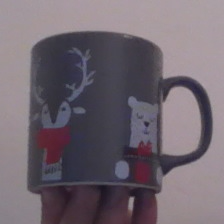

In [21]:
from tensorflow import keras
image_path = './imageclassifier-main/data/cup/12-25-13-559476.png'
im =keras.preprocessing.image.load_img(image_path)
im

In [10]:
im.size

(224, 224)

In [12]:
numpy_image = np.array(im)
numpy_image.shape

(224, 224, 3)

In [13]:
image_batch = np.expand_dims(numpy_image, axis=0)
image_batch.shape

(1, 224, 224, 3)

In [14]:
processed_image = keras.applications.vgg16.preprocess_input(image_batch)

In [15]:
prediction = vgg_model.predict(processed_image)
label_vgg = keras.applications.imagenet_utils.decode_predictions(prediction)

49152/35363 [=========================================] - 0s 1us/step


In [16]:
label_vgg

[[('n03063599', 'coffee_mug', 0.73134345),
  ('n07930864', 'cup', 0.062096585),
  ('n04423845', 'thimble', 0.019106792),
  ('n03666591', 'lighter', 0.013724921),
  ('n03063689', 'coffeepot', 0.008418317)]]

Text(0.5, 1.0, 'coffee_mug or cup')

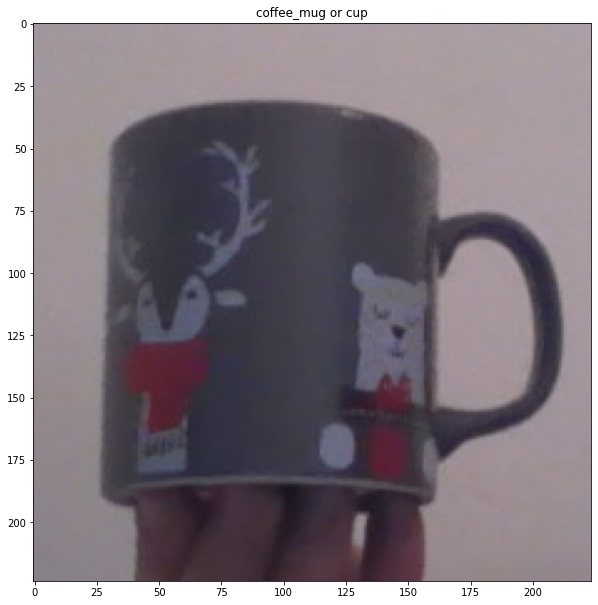

In [19]:
plt.imshow(im)
plt.title(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )

In [20]:
vgg_model.save('./imageclassifier-main/models/model_vgg16.h5')

In [36]:
def predict_frame(image):
    # reverse color channels
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   

    # reshape image to (1, 224, 224, 3)
    numpy_image = np.array(image)
    image_batch = np.expand_dims(numpy_image, axis=0)

    # apply pre-processing
    processed_image = keras.applications.vgg16.preprocess_input(image_batch)
        
    """predict"""
    predictions = vgg_model.predict(processed_image)
    label_vgg = keras.applications.imagenet_utils.decode_predictions(predictions)
    print(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )



In [37]:
import cv2
predict_frame(im)

coffee_mug or cup
